In [11]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [12]:
# patient list

patient_df = pd.read_excel('/Users/yena/Desktop/SCH/척척석사/EMR related/낙상데이터/천안/(천안병원)간호간병통합병동 낙상대상자 리스트(2017-2021.10).xlsx', index_col =0)
patient_list = patient_df['등록번호'].astype(str).unique()  # 등록번호 unique -> 228명 확인
fall_date = patient_df[['등록번호', '낙상발생일시']]

duration=[]

for i in fall_date['낙상발생일시'].tolist():
    i = str(i)
    i = i.split(' ')[0]
    duration.append(i)

fall_date['낙상발생일시'] = duration



In [13]:
# str_to_dt 함수

import datetime

def str_to_dt(x):
    x = str(x)
    d = int(x[0:4])
    y = int(x[4:6])
    z = int(x[6:8])
    # hours = int(x[8:10])
    # mins = int(x[10:12])
    # secs = int(x[12:])
    # str_data = (d+','+y+','+z+','+hours+','+mins+','+secs)
    new_time = datetime.datetime(d,y,z)
    new_time_no = new_time.replace(microsecond = 0)
    
    return new_time_no

In [14]:
pat_drug_ = pd.read_excel('/Users/yena/Desktop/SCH/척척석사/EMR related/낙상데이터/천안/(비식별화)호흡기 류지원 교수님 낙상자료 관련 약물정보 변경에 따른 자료 재추출_2020311.xlsx')
atc_org_ = pd.read_excel('/Users/yena/Desktop/SCH/척척석사/EMR related/낙상데이터/ATC_cluster.xlsx')

In [15]:
pat_drug_.head(2)

,낙상발생일자,구분,처방일자,환자번호,성별,나이,병동명,진료과,진료과명,엑셀시트 구분,...,KIMS분류코드,KIMS분류명,ATC분류코드,ATC분류명,처방수량,입력단위,횟수단위,횟수수량,일수,용법
0,20201024,낙상발생일로부터 -1일째,20201023,43940,여,59,별2B,MP,호흡기내과,anxiolytics,...,4a,항불안제(Anxiolytics),N05BB01,Hydroxyzine,3.0,tab,#,3,1,TP
1,20201024,낙상발생일로부터 -1일째,20201023,43940,여,59,별2B,MP,호흡기내과,antithrombotic agents,...,2n,"항응고제, 항혈소판제, 섬유소용해제(혈전용해제)",B01AB01,Heparin,1.0,vial,*,1,1,UDR


In [16]:
pat_drug_.columns

Index(['낙상발생일자', '구분', '처방일자', '환자번호', '성별', '나이', '병동명', '진료과', '진료과명',
       '엑셀시트 구분', '처방코드', '복지부분류코드', '복지부분류명', 'KIMS분류코드', 'KIMS분류명',
       'ATC분류코드', 'ATC분류명', '처방수량', '입력단위', '횟수단위', '횟수수량', '일수', '용법'],
      dtype='object')

In [17]:
pat_drug_ = pat_drug_.rename(columns={'환자번호':'등록번호'})
pat_drug_ = pat_drug_.rename(columns={'낙상발생일자':'낙상발생일시'})
pat_drug_ = pat_drug_.rename(columns={'처방일자':'평가일자'})
pat_drug_.columns

Index(['낙상발생일시', '구분', '평가일자', '등록번호', '성별', '나이', '병동명', '진료과', '진료과명',
       '엑셀시트 구분', '처방코드', '복지부분류코드', '복지부분류명', 'KIMS분류코드', 'KIMS분류명',
       'ATC분류코드', 'ATC분류명', '처방수량', '입력단위', '횟수단위', '횟수수량', '일수', '용법'],
      dtype='object')

In [18]:
atc_drug = pat_drug_[['등록번호','낙상발생일시', '평가일자', 'ATC분류코드']]
atc_drug['낙상발생일시'] = atc_drug['낙상발생일시'].apply(str_to_dt)
atc_drug['평가일자'] = atc_drug['평가일자'].apply(str_to_dt)

In [19]:
atc_drug['유무'] = atc_drug['낙상발생일시']-atc_drug['평가일자']
atc_drug['유무'] = atc_drug['유무'].astype(str)
cond = ['0 days', '1 days', '2 days', '3 days']
atc_drug['유무'] = atc_drug['유무'].astype(str)
atc_drug = atc_drug[atc_drug['유무'].isin(set(cond))]

len(atc_drug['등록번호'].unique())

77

In [20]:
atc_drug = atc_drug.merge(atc_org_, on = ['ATC분류코드']).drop_duplicates()
atc_drug = atc_drug.astype(str)
atc_drug = atc_drug[atc_drug['등록번호'].isin(set(patient_list))]
len(atc_drug['등록번호'].unique())

77

In [21]:
# atc_drug = atc_drug.drop(columns=['no']).drop_duplicates()
atc_drug['Cluster_c'] = atc_drug['Cluster']

In [22]:
atc_test = pd.DataFrame(atc_drug.groupby(['등록번호', '낙상발생일시', '평가일자', '유무', 'Cluster'])['Cluster_c'].count()).reset_index().drop_duplicates()

In [23]:
atc_drug

,등록번호,낙상발생일시,평가일자,ATC분류코드,유무,no,ATC분류명,Cluster,Cluster_c
0,43940,2020-10-24,2020-10-23,N05BB01,1 days,1,Hydroxyzine,J,J
1,43940,2020-10-24,2020-10-22,N05BB01,2 days,1,Hydroxyzine,J,J
2,43940,2020-10-24,2020-10-21,N05BB01,3 days,1,Hydroxyzine,J,J
3,43940,2020-10-24,2020-10-24,N05BB01,0 days,1,Hydroxyzine,J,J
4,43940,2020-10-24,2020-10-23,B01AB01,1 days,2,Heparin,G,G
...,...,...,...,...,...,...,...,...,...
2470,3113082,2019-11-12,2019-11-12,C01AA05,0 days,156,Digoxin,A,A
2471,3113082,2019-11-12,2019-11-11,C09AA05,1 days,157,Ramipril,I,I
2472,3113082,2019-11-12,2019-11-10,C09AA05,2 days,157,Ramipril,I,I
2473,3113082,2019-11-12,2019-11-09,C09AA05,3 days,157,Ramipril,I,I


In [24]:
atc_test.to_csv('천안_낙상_약물.csv')

In [25]:
eda_drug = pd.DataFrame(atc_test.groupby(['유무', 'Cluster'])['Cluster_c'].sum()).reset_index().drop_duplicates()
eda_drug['Cluster_c'] = eda_drug['Cluster_c'].astype(int)
eda_drug

,유무,Cluster,Cluster_c
0,0 days,A,19
1,0 days,B,32
2,0 days,C,120
3,0 days,D,11
4,0 days,E,31
...,...,...,...
83,3 days,R,17
84,3 days,S,98
85,3 days,T,17
86,3 days,U,10


In [26]:
### 수면제에 유의미한 내용 없는 듯, 오히려 마약류?
cond = ['P','J', 'K','C']
eda_drug[eda_drug['Cluster'].isin(set(cond))]

,유무,Cluster,Cluster_c
2,0 days,C,120
9,0 days,J,15
10,0 days,K,10
15,0 days,P,4
24,1 days,C,109
31,1 days,J,14
32,1 days,K,7
37,1 days,P,6
46,2 days,C,100
53,2 days,J,11


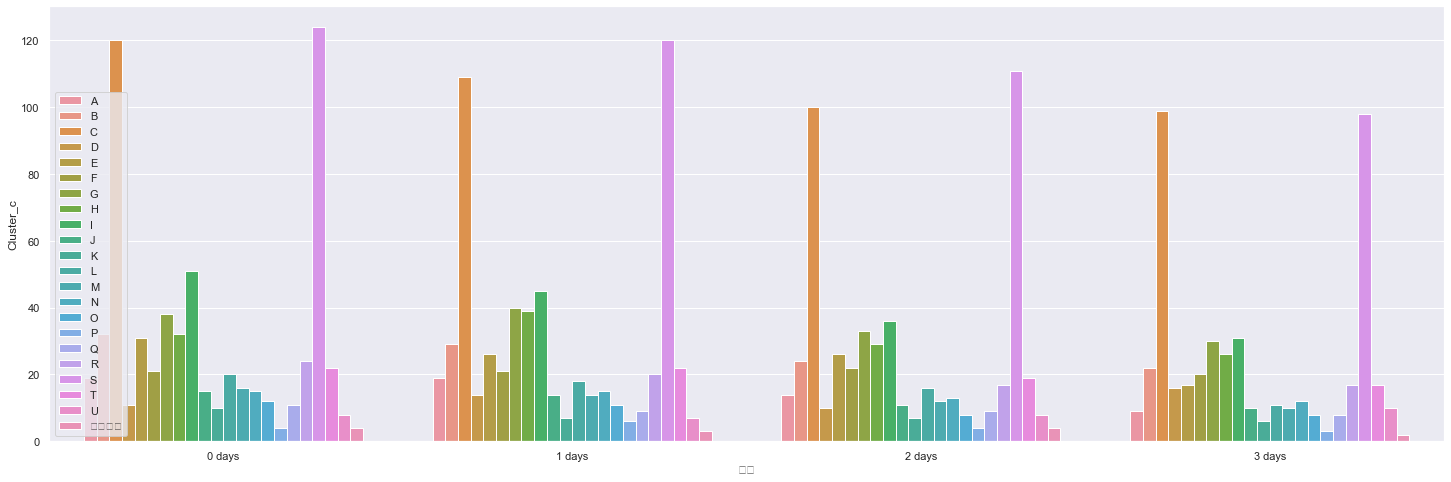

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(25,8)})
sns.barplot(x = eda_drug['유무'], y = eda_drug['Cluster_c'], hue = eda_drug['Cluster'])

plt.legend(loc='lower left')